# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [46]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import random
import datetime as dt
%pylab inline
import urllib
import json
import gspread
from oauth2client.service_account import ServiceAccountCredentials 
import os
import glob
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std


Populating the interactive namespace from numpy and matplotlib


/nfshome/ku373/.conda/envs/myenv3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'scatter', 'f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# For extra credit, I pick up the data from google doc with API.

In [2]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
os.chdir(os.getenv("PUIDATA"))
os.getcwd()

'/nfshome/ku373/PUIdata'

In [3]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('My Project-998626e8cb7b.json', scope)

In [4]:
gc = gspread.authorize(credentials)

In [5]:
# I picked up the spreadsheet key from the linked google spreadsheet. 
#If you change the sheet location, it will be expired.

SPREADSHEET_KEY = '1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs'
worksheet = gc.open_by_key(SPREADSHEET_KEY).sheet1

In [6]:
list_of_lists = worksheet.get_all_values()

In [7]:
data = []
for i in range(1,10):
    values_list = worksheet.col_values(i)
    data.append(values_list)


In [37]:
df = pd.DataFrame(data).T
df.columns = df.iloc[0]
df.drop([0],inplace=True)
df.rename(columns={'Country/Territory': 'Country'},inplace=True)


In [9]:
os.getcwd()
os.system("wget " + "data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78 ")


512

In [10]:
urllib.request.urlretrieve("data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78", "file1.csv")


('file1.csv', <email.message.Message at 0x7fe50a238c18>)

In [11]:
df1= pd.read_csv('file1.csv')
df1.rename(columns={'Number of mass shootings (1983-2013)': 'Number of mass shootings'},inplace=True)

df1

,Country,Guns per 100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0
5,Finland,45.3,2
6,France,31.2,6
7,Germany,30.3,7
8,Greece,22.5,0
9,Holland,3.9,2


In [12]:
url = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv" 
urllib.request.urlretrieve(url, "worldbank.zip")

('worldbank.zip', <http.client.HTTPMessage at 0x7fe50a22fc88>)

In [13]:
os.system("unzip " + os.getenv("PUIDATA") + "/" + "worldbank.zip")

256

In [14]:
a = glob.glob('API_SP*.csv')
os.rename(a[0], 'worldbank.csv')


In [15]:
worldbank = pd.read_csv('worldbank.csv',skiprows=1,header=1)#, header=None
df2 = worldbank[['Country Name','2013']]
df2.rename(columns={'Country Name': 'Country','2013': 'pop'},inplace=True)

df2.head()

/nfshome/ku373/.conda/envs/myenv3.7/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Country,pop
0,Aruba,103187.0
1,Afghanistan,31731688.0
2,Angola,25998340.0
3,Albania,2895092.0
4,Andorra,80788.0


In [16]:
url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv" 
urllib.request.urlretrieve(url, "worldbankGDP.zip")

('worldbankGDP.zip', <http.client.HTTPMessage at 0x7fe50a1e2588>)

In [17]:
os.system("unzip " + os.getenv("PUIDATA") + "/" + "worldbankGDP.zip")

256

In [18]:
b = glob.glob('API_NY*.csv')
os.rename(b[0], 'worldbankGDP.csv')


In [19]:
worldbankGDP =pd.read_csv('worldbankGDP.csv',skiprows=1,header=1)
df5 = worldbankGDP[['Country Name','2013']]
df5.rename(columns={'Country Name': 'Country','2013': 'GDP'},inplace=True)

df5.head()

,Country,GDP
0,Aruba,NaN
1,Afghanistan,2.026425e+10
2,Angola,1.249125e+11
3,Albania,1.277628e+10
4,Andorra,3.281585e+09


In [20]:
df3 = pd.merge(df, df1, on='Country')


In [21]:
df4 = pd.merge(df3, df2, on='Country')
df4

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,pop
0,Australia,AU,NSO,11.5,30,0.14,42,15,3050000,15.0,4,23145901.0
1,Austria,AT,CTS,29.5,18,0.22,14,30.4,2500000,30.4,1,8479823.0
2,Belgium,BE,WHO-MDB,39.5,70,0.68,34,17.2,1800000,17.2,2,11182817.0
3,Canada,CA,CTS,32,173,0.51,13,30.8,9950000,30.8,4,35152370.0
4,Denmark,DK,CTS,31.9,15,0.27,54,12,650000,12.0,0,5614932.0
5,Finland,FI,CTS,19.8,24,0.45,4,45.3,2400000,45.3,2,5438972.0
6,France,FR,WHO-MDB,9.6,35,0.06,12,31.2,19000000,31.2,6,65998660.0
7,Germany,DE,CTS/National police,26.3,158,0.19,15,30.3,25000000,30.3,7,80645605.0
8,Greece,GR,WHO-MDB,34.9,29,0.26,23,22.5,2500000,22.5,0,10965211.0
9,Hungary,HU,CTS,5,7,0.07,93,5.5,560000,5.5,0,9893082.0


In [22]:
df6 = pd.merge(df4, df5, on='Country')
df6.head()

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,pop,GDP
0,Australia,AU,NSO,11.5,30,0.14,42,15,3050000,15.0,4,23145901.0,1.573697e+12
1,Austria,AT,CTS,29.5,18,0.22,14,30.4,2500000,30.4,1,8479823.0,4.300687e+11
2,Belgium,BE,WHO-MDB,39.5,70,0.68,34,17.2,1800000,17.2,2,11182817.0,5.209255e+11
3,Canada,CA,CTS,32,173,0.51,13,30.8,9950000,30.8,4,35152370.0,1.842628e+12
4,Denmark,DK,CTS,31.9,15,0.27,54,12,650000,12.0,0,5614932.0,3.435844e+11


## df7 is the cleaned version.

In [39]:
df7 = df6.drop(['ISO code','Source','% of homicides by firearm','Rank by rate of ownership',
                'Average firearms per 100 people','Homicide by firearm rate per 100,000 pop'],axis=1)
df7

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,pop,GDP
0,Australia,30,3050000,15.0,4,23145901.0,1.573697e+12
1,Austria,18,2500000,30.4,1,8479823.0,4.300687e+11
2,Belgium,70,1800000,17.2,2,11182817.0,5.209255e+11
3,Canada,173,9950000,30.8,4,35152370.0,1.842628e+12
4,Denmark,15,650000,12.0,0,5614932.0,3.435844e+11
5,Finland,24,2400000,45.3,2,5438972.0,2.699801e+11
6,France,35,19000000,31.2,6,65998660.0,2.811078e+12
7,Germany,158,25000000,30.3,7,80645605.0,3.752514e+12
8,Greece,29,2500000,22.5,0,10965211.0,2.398620e+11
9,Hungary,7,560000,5.5,0,9893082.0,1.352157e+11


In [24]:
df_=df7
df_['Number of homicides by firearm'] = df_['Number of homicides by firearm'].astype(np.int64)
df_['Average total all civilian firearms'] = df_['Average total all civilian firearms'].astype(np.int64)
df_.dtypes


Country                                 object
Number of homicides by firearm           int64
Average total all civilian firearms      int64
Guns per 100 inhabitants               float64
Number of mass shootings                 int64
pop                                    float64
GDP                                    float64
dtype: object

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


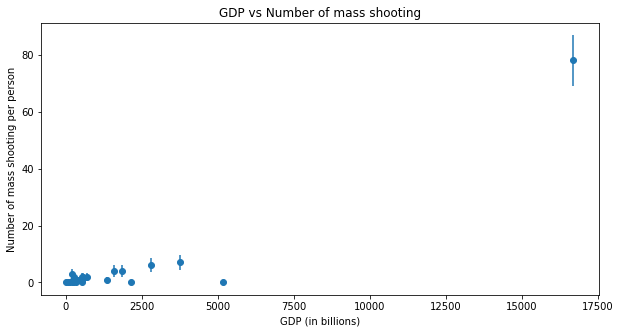

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [25]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.GDP / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.GDP / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.title('GDP vs Number of mass shooting')
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [26]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,pop,GDP,shootingspp
0,Australia,30,3050000,15.0,4,23145901.0,1.573697e+12,0.000173
1,Austria,18,2500000,30.4,1,8479823.0,4.300687e+11,0.000118
2,Belgium,70,1800000,17.2,2,11182817.0,5.209255e+11,0.000179
3,Canada,173,9950000,30.8,4,35152370.0,1.842628e+12,0.000114
4,Denmark,15,650000,12.0,0,5614932.0,3.435844e+11,0.000000


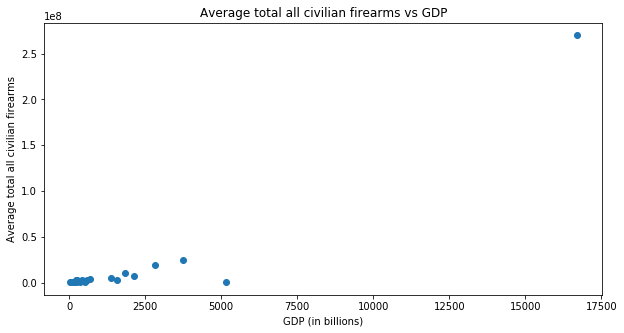

In [27]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.GDP / 1e9, df_['Average total all civilian firearms'])

ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.title('Average total all civilian firearms vs GDP')
pl.show()


#### Average total all civilian firearms vs GDP. The datapoint to the top right of the plot is the USA which has both the highest GDP and the highest average total all civilian firearms

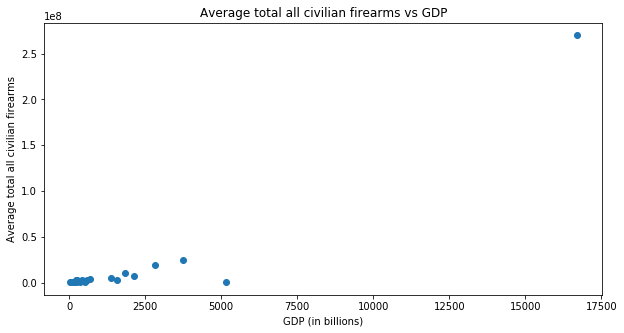

In [28]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.GDP / 1e9, df_['Average total all civilian firearms'])
ax.errorbar(df_.GDP / 1e9, df_['Average total all civilian firearms'], 
            yerr = np.sqrt(df_['Average total all civilian firearms'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.title('Average total all civilian firearms vs GDP')
pl.show()


#### Average total all civilian firearms vs GDP. Errors represent Poisson statistics. The datapoint to the top right of the plot is the USA which has both the highest GDP and the highest average total all civilian firearms

#### US is an outlier. We can't see the error bars because of the scale.

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

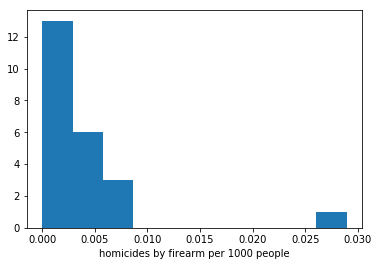

In [29]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

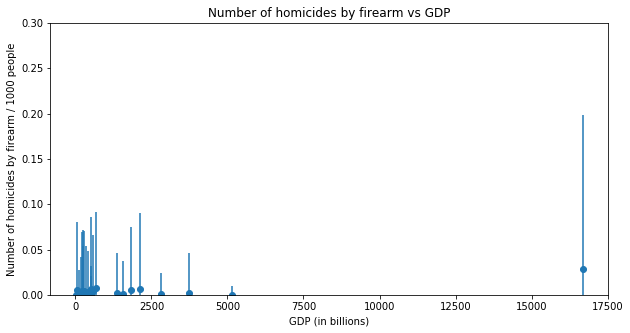

In [30]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.GDP / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.errorbar(df_.GDP / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1000 * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearm / 1000 people")
ax.set_ylim(0,0.3)
pl.title('Number of homicides by firearm vs GDP')
pl.show()


#### Number of homicides by firearm vs GDP. Errors represent Poisson statistics. The datapoint to the right of the plot is the USA which has both the highest GDP and the highest number of homicides by firearm

#### Again, US is an outlier. 

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


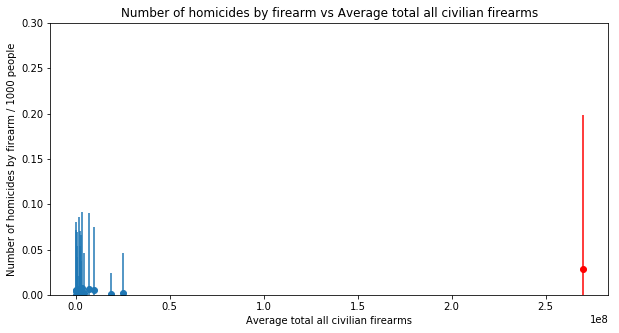

In [44]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'][22] , df_['Number of homicides by firearm'][22] / df_['pop'][22] * 1000,c='red')
ax.errorbar(df_['Average total all civilian firearms'][22] , df_['Number of homicides by firearm'][22] / df_['pop'][22] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'][22] / df_['pop'][22] * 1000 * 1.0), fmt = '.',c='red')

scatter = ax.scatter(df_['Average total all civilian firearms'][0:22] , df_['Number of homicides by firearm'][0:22] / df_['pop'][0:22] * 1000)
ax.errorbar(df_['Average total all civilian firearms'][0:22] , df_['Number of homicides by firearm'][0:22] / df_['pop'][0:22] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'][0:22] / df_['pop'][0:22] * 1000 * 1.0), fmt = '.')


ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm / 1000 people")
ax.set_ylim(0,0.3)
pl.title('Number of homicides by firearm vs Average total all civilian firearms')
pl.show()

#### Number of homicides by firearm vs Average total all civilian firearms. Errors represent Poisson statistics. The datapoint to the right of the plot is the USA which has both the highest number of homicides by firearm and the highest total all civilian firearms

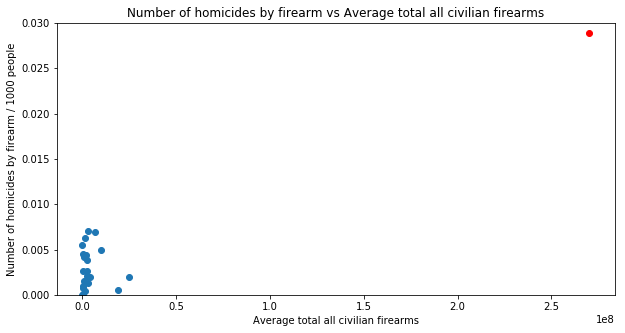

In [41]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'][0:22], df_['Number of homicides by firearm'][0:22] / df_['pop'][0:22] * 1000)
scatter = ax.scatter(df_['Average total all civilian firearms'][22], df_['Number of homicides by firearm'][22] / df_['pop'][22] * 1000,c='red')


ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm / 1000 people")
ax.set_ylim(0,0.03)
pl.title('Number of homicides by firearm vs Average total all civilian firearms')
pl.show()

#### Number of homicides by firearm vs Average total all civilian firearms. The datapoint to the right of the plot is the USA which has both the highest number of homicides by firearm and the highest total all civilian firearms

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


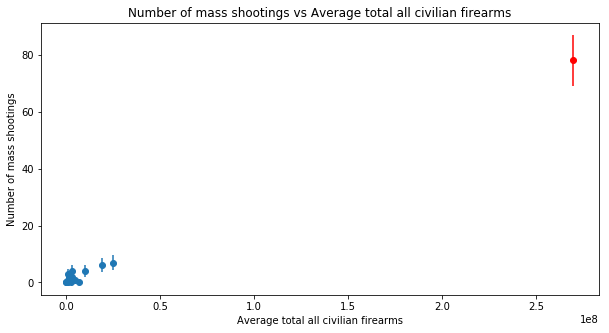

In [33]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'][22], df_['Number of mass shootings'][22],c='red' )

scatter = ax.scatter(df_['Average total all civilian firearms'][0:22], df_['Number of mass shootings'][0:22] )

ax.errorbar(df_['Average total all civilian firearms'][22], df_['Number of mass shootings'][22] , 
            yerr = np.sqrt(df_['Number of mass shootings'][22] * 1.0), fmt = '.',c='red' )
ax.errorbar(df_['Average total all civilian firearms'][0:22], df_['Number of mass shootings'][0:22] , 
            yerr = np.sqrt(df_['Number of mass shootings'][0:22] * 1.0), fmt = '.' )


ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.title('Number of mass shootings vs Average total all civilian firearms')
pl.show()

#### Number of mass shootings vs Average total all civilian firearms. Errors represent Poisson statistics. The datapoint to the right of the plot is the USA which has both the highest number of mass shootings and the highest total all civilian firearms

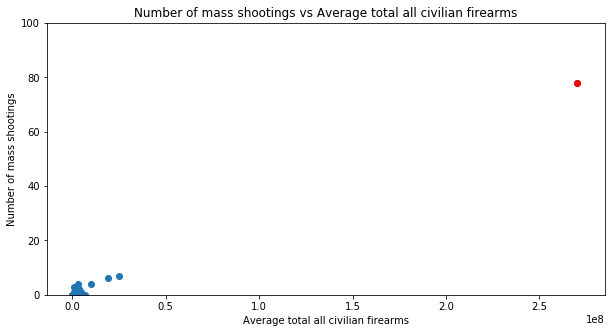

In [34]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'] )
scatter = ax.scatter(df_['Average total all civilian firearms'][22], df_['Number of mass shootings'][22],c='red' )
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim(0,100)
pl.title('Number of mass shootings vs Average total all civilian firearms')
pl.show()

#### Number of mass shootings vs Average total all civilian firearms. The datapoint to the right of the plot is the USA which has both the highest number of mass shootings and the highest total all civilian firearms

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




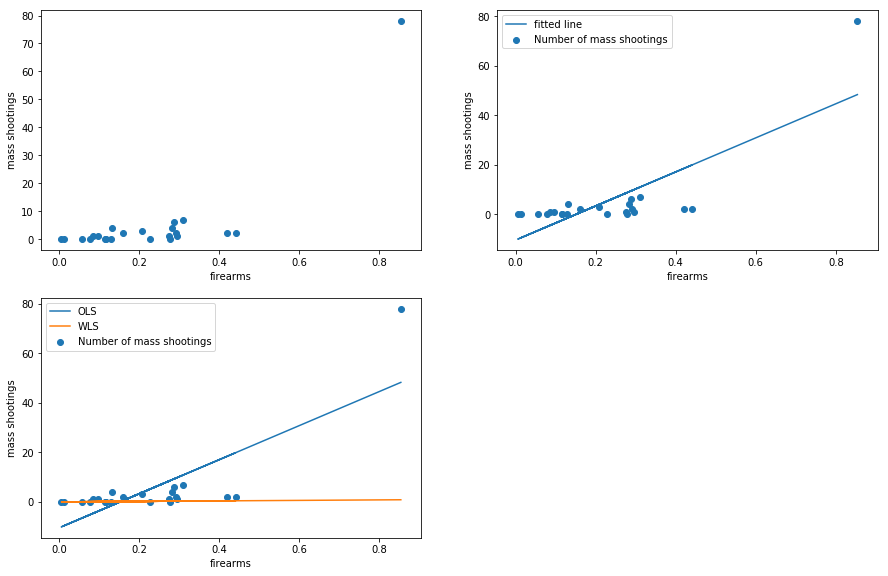

In [45]:
fig = pl.figure(figsize=(15,15)) 
ax = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)

scatter = ax.scatter(df_['Average total all civilian firearms']/df_['pop'], 
                     df_['Number of mass shootings'])
ax.set_xlabel('firearms')
ax.set_ylabel('mass shootings')
ax.set_ylim()



#statsmodels OLS
x = df_['Average total all civilian firearms']/df_['pop']
x1 = sm.add_constant(x)
x1
smfit = smf.OLS(df_['Number of mass shootings'], x1).fit()
c, d = smfit.params

scatter = ax1.scatter(df_['Average total all civilian firearms']/df_['pop'], 
                     df_['Number of mass shootings'] )
ax1.set_xlabel('firearms')
ax1.set_ylabel('mass shootings')
ax1.plot(x, d*x+c, label="fitted line")
ax1.legend(loc='upper left')


# WLS 

w = 1. / (np.std(np.sqrt(x))**2)

mod_wls = sm.WLS(df_['Average total all civilian firearms']/df_['pop'], x1, weights=w)
res_wls = mod_wls.fit()
e, f = res_wls.params

scatter = ax2.scatter(df_['Average total all civilian firearms']/df_['pop'], 
                     df_['Number of mass shootings'] )

ax2.set_xlabel('firearms')
ax2.set_ylabel('mass shootings')
ax2.plot(x, d*x+c, label="OLS")
ax2.plot(x, f*x+e, label="WLS")
ax2.legend(loc='upper left')



Outlier removal:

The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595


## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [36]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

FileNotFoundError: [Errno 2] No such file or directory: '../Lab5_fb55/confidence_intervals_regression.png'

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [ ]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings